<a href="https://colab.research.google.com/github/williamosherson/hackathon/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
thing = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/node_data.csv')

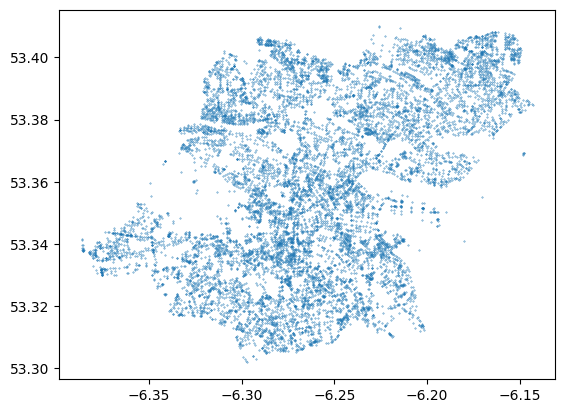

In [ ]:
plt.scatter(np.array(thing['x']),np.array(thing['y']),s=0.1)

In [ ]:
adj_matrix = np.load('/content/drive/MyDrive/Hackathon 2025/adj_matrix.npy')

In [ ]:
adj_matrix.shape

(11565, 11565)

In [ ]:
np.sum((adj_matrix.T - adj_matrix)**2)

np.float64(4170.0)

In [ ]:
edges = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/edges_data.csv')
nodes = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/node_data.csv')



In [ ]:
edges['highway'].to_list()

['secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'tertiary',
 'secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'unclassified',
 'residential',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'unclassified',
 'tertiary',
 'secondary',
 'tertiary',
 'secondary',
 'tertiary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'residential',
 'secondary',
 'secondary',
 'residential',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'tertiary',
 'tertiary',
 'secondary',
 'secondary',
 'tertiary',
 'secondary',
 'secondary',
 'resident

In [ ]:
for i, maxspeed in enumerate(edges['maxspeed']):
    if isinstance(maxspeed,float):
      maxspeed=31
      edges.loc[edges.index[i], 'maxspeed'] = maxspeed
    if isinstance(maxspeed, str) and '[' in maxspeed:
          # Convert the string representation of list to actual list
          speed_list = eval(maxspeed)
          # Calculate the average
          sum = 0
          for number in eval(maxspeed):
            sum +=eval(number)
          meanmaxspeed = sum/len(eval(maxspeed))
          # Update the value in the DataFrame using .loc
          edges.loc[edges.index[i], 'maxspeed'] = meanmaxspeed

#Small change for test
for i, lanes in enumerate(edges['lanes']):
    if isinstance(lanes, str) and '[' in lanes:
          # Convert the string representation of list to actual list
          lanes_list = eval(lanes)
          # Calculate the average
          sum = 0
          for number in eval(lanes):
            sum +=eval(number)
          meanlanes = sum/len(eval(lanes))
          # Update the value in the DataFrame using .loc
          edges.loc[edges.index[i], 'lanes'] = meanlanes

#Small change for test

In [ ]:
edges['lanes'] = edges['lanes'].fillna(1).astype(float)
edges['maxspeed'] = edges['maxspeed'].astype(float)

In [ ]:
edges['times'] = edges['length']/edges['maxspeed']
edges['lanes'] = edges['lanes'].fillna(1).astype(float)

In [ ]:
nodes

,osmid,y,x,street_count,junction,ref,highway,railway,geometry
0,389279,53.345341,-6.267631,3,NaN,NaN,NaN,NaN,POINT (-6.2676306 53.3453413)
1,389281,53.339589,-6.265864,4,NaN,NaN,NaN,NaN,POINT (-6.2658639 53.3395894)
2,389292,53.348280,-6.254945,4,yes,J41,NaN,NaN,POINT (-6.2549447 53.3482797)
3,389302,53.340196,-6.272256,3,NaN,NaN,NaN,NaN,POINT (-6.2722556 53.3401961)
4,389303,53.339365,-6.272570,3,NaN,NaN,NaN,NaN,POINT (-6.2725703 53.3393653)
...,...,...,...,...,...,...,...,...,...
11560,13013917422,53.334421,-6.243880,3,NaN,NaN,NaN,NaN,POINT (-6.2438802 53.3344211)
11561,13042760002,53.363194,-6.314448,3,NaN,NaN,NaN,NaN,POINT (-6.3144477 53.3631943)
11562,13042760003,53.363134,-6.314539,3,NaN,NaN,NaN,NaN,POINT (-6.3145391 53.363134)
11563,13051535633,53.367809,-6.276098,1,NaN,NaN,turning_circle,NaN,POINT (-6.2760979 53.3678092)


In [ ]:
osmids = nodes['osmid']

In [ ]:
indextoosmid=osmids.to_dict()
osmidtoindex = inverted_dict = {value: key for key, value in indextoosmid.items()}

In [ ]:
from time import time_ns
time_edge_dict = {(row['u'], row['v']): row['times'] for _, row in edges.iterrows()}
lanes_edge_dict = {(row['u'], row['v']): row['lanes'] for _, row in edges.iterrows()}

In [ ]:
adjacencymatrix = np.zeros((11565,11565))
for start_osmid in nodes['osmid']:
  i = osmidtoindex[start_osmid]
  for end_osmid in edges[edges['u'] == start_osmid]['v']:
    j = osmidtoindex[end_osmid]
    adjacencymatrix[i,j] += 1/(lanes_edge_dict[(start_osmid,end_osmid)]/time_edge_dict[(start_osmid,end_osmid)])

In [ ]:
doubledroads = []
for i in range(11565):
  for j in range(11565):
    if adj_matrix[i,j] != 0 and adj_matrix[i,j] != 1:
      doubledroads.append((i,j))
trippledroads = []
for i in range(11565):
  for j in range(11565):
    if adj_matrix[i,j] != 0 and adj_matrix[i,j] != 1 and adj_matrix[i,j] != 2:
      trippledroads.append((i,j))

In [ ]:
trippledroads

[(644, 645), (645, 644), (1170, 1171), (1171, 1170)]

In [ ]:
import networkx as nx
import numpy as np
from scipy import sparse

# Create a graph from your sparse matrix
sparse_matrix = sparse.csr_matrix(adjacencymatrix)
G = nx.from_scipy_sparse_array(sparse_matrix, edge_attribute='weight')

# Let's sample 200 random nodes
k = 200
random_nodes = np.random.choice(G.nodes(), size=k, replace=False)

# Calculate partial betweenness using the sample
approx_bc = nx.betweenness_centrality_subset(
    G,
    sources=random_nodes,  # Use our random sample as sources
    targets=random_nodes,  # ...and as targets
    weight='weight',       # Use the edge weight
    normalized=False
)

# Now you have a dictionary: {node_id: approximate_bc_value}
# Sort it to find the top nodes
sorted_approx_bc = sorted(approx_bc.items(), key=lambda x: x[1], reverse=True)

print("Top 10 most central nodes (from sample):")
for i, (node, bc) in enumerate(sorted_approx_bc[:10]):
    print(f"{i+1}. Node {node}: {bc}, osmid:{indextoosmid[node]}")

Top 10 most central nodes (from sample):
1. Node 169: 6271.0, osmid:672383
2. Node 7739: 4994.0, osmid:1420455242
3. Node 471: 4953.0, osmid:12649687
4. Node 3: 4892.0, osmid:389302
5. Node 4: 4892.0, osmid:389303
6. Node 7746: 4892.0, osmid:1420459909
7. Node 7885: 4892.0, osmid:1426048972
8. Node 7896: 4892.0, osmid:1426051353
9. Node 8033: 4892.0, osmid:1430847297
10. Node 8704: 4892.0, osmid:2374841982


In [ ]:
scatsdata = pd.read_csv('SCATSMay2025.csv')
scatsdata

,End_Time,Region,Site,Detector,Sum_Volume,Avg_Volume,Weighted_Avg,Weighted_Var,Weighted_Std_Dev
0,20250526020000,CCITY,403,21,0,0,NaN,NaN,NaN
1,20250526020000,CCITY,403,22,0,0,NaN,NaN,NaN
2,20250526020000,CCITY,403,23,0,0,NaN,NaN,NaN
3,20250526020000,CCITY,403,24,0,0,NaN,NaN,NaN
4,20250526020000,CCITY,404,1,2,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12194284,20250531230000,SCITY,158,21,0,0,NaN,NaN,NaN
12194285,20250531230000,SCITY,158,22,0,0,NaN,NaN,NaN
12194286,20250531230000,SCITY,158,23,0,0,NaN,NaN,NaN
12194287,20250531230000,SCITY,158,24,0,0,NaN,NaN,NaN


In [ ]:
scatsdata['Sum_Volume'].min()

0

In [ ]:
trafficsignals = pd.read_csv('/content/dcc_traffic_signals_20221130.csv')
trafficsignals['SiteID'].max()

1002

In [ ]:
trafficsignals

,SiteID,Site_Description_Cap,Site_Description_Lower,Region,Lat,Long,Site_Type
0,1,ABBEY ST @ MARLBOROUGH ST (LUAS),abbey st @ marlborough st (luas),CCITY,53.348754,-6.257607,SCATS Site
1,2,AMIENS ST @ SEVILLE PL,amiens st @ seville pl,CCITY,53.354711,-6.246679,SCATS Site
2,3,AMIENS ST @ TALBOT ST,amiens st @ talbot st,CCITY,53.351374,-6.250073,SCATS Site
3,4,ANNESLEY PL @ POPLAR ROW,annesley pl @ poplar row,NCITY,53.361145,-6.240513,SCATS Site
4,5,NCR @ AUGHRIM ST,ncr @ aughrim st,WCITY1,53.355797,-6.292406,SCATS Site
...,...,...,...,...,...,...,...
820,964,NORTH CIRCULAR ROAD @ TUD,north circular road @ tud,WCITY1,53.357519,-6.286843,SCATS Site
821,965,HOLE IN THE WALL / MARSFIELD BELMAYNE,hole in the wall / marsfield belmayne,DCC1,53.408150,-6.161950,SCATS Site
822,968,BRIDE ST @ BRIDE RD,bride st @ bride rd,SCITY,53.341474,-6.270088,SCATS Site
823,974,BLACKHORSE AVE @ NEPHIN RD,blackhorse ave @ nephin rd,WCITY1,53.362728,-6.311709,SCATS Site


In [ ]:
# Filter scatsdata to only include sites present in trafficsignals
filtered_scatsdata = scatsdata[scatsdata['Site'].isin(trafficsignals['SiteID'])]

# Merge the filtered scatsdata with trafficsignals on the site ID
merged_data = pd.merge(filtered_scatsdata, trafficsignals, left_on='Site', right_on='SiteID', how='left')

# Create a new DataFrame with specified columns
new_df = merged_data[['SiteID', 'Lat', 'Long', 'Avg_Volume', 'Sum_Volume']]

# Group by SiteID and calculate the mean of the numerical columns
averaged_df = new_df.groupby('SiteID').mean().reset_index()

# Display the new DataFrame
display(averaged_df)

,SiteID,Lat,Long,Avg_Volume,Sum_Volume
0,1,53.348754,-6.257607,0.470165,7.649300
1,2,53.354711,-6.246679,4.023332,49.738819
2,3,53.351374,-6.250073,2.709285,33.607639
3,4,53.361145,-6.240513,1.106407,14.131384
4,5,53.355797,-6.292406,10.694220,132.421819
...,...,...,...,...,...
647,964,53.357519,-6.286843,10.659946,133.018817
648,965,53.408150,-6.161950,1.835403,23.986563
649,968,53.341474,-6.270088,1.499012,19.363239
650,974,53.362728,-6.311709,1.927838,23.873243


In [ ]:
# Create a list of SiteIDs from trafficsignals that are not in scatsdata
missing_site_ids = trafficsignals[~trafficsignals['SiteID'].isin(scatsdata['Site'])]['SiteID'].tolist()

# Display the list of missing SiteIDs
len(missing_site_ids)

170

In [ ]:
dlrtraffictings = pd.read_csv('/content/dlr_scats_sites-1.csv')
dlrtraffictings

,Site_ID,Location,Lat,Long
0,1124,Stillorgan Rd @ Mt Merrion Rd,53.296715,-6.204066
1,6000,Kilmacud Rd Upper @ Blackthorn Ave (Luas),53.279287,-6.210832
2,6001,Stillorgan Rd @ Trees Rd,53.293577,-6.201737
3,6002,Stillorgan Rd @ Priory Drive(T123A),53.293486,-6.201812
4,6003,Bray Rd@Brewery Rd (6003)(T121),53.282363,-6.193424
...,...,...,...,...
285,6400,Murphystown Way @ Lightburne,53.268340,-6.210580
286,6401,Dublin Road @ Woodbrook,53.218390,-6.119790
287,6402,Mount Anville Ped,53.288600,-6.218520
288,6404,Newtownpark Avenue @ Pine Lawn,53.285000,-6.177400


/tmp/ipython-input-870853057.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis') # Get the colormap object
/tmp/ipython-input-870853057.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_traffic = plt.cm.get_cmap('hot') # Get the colormap object


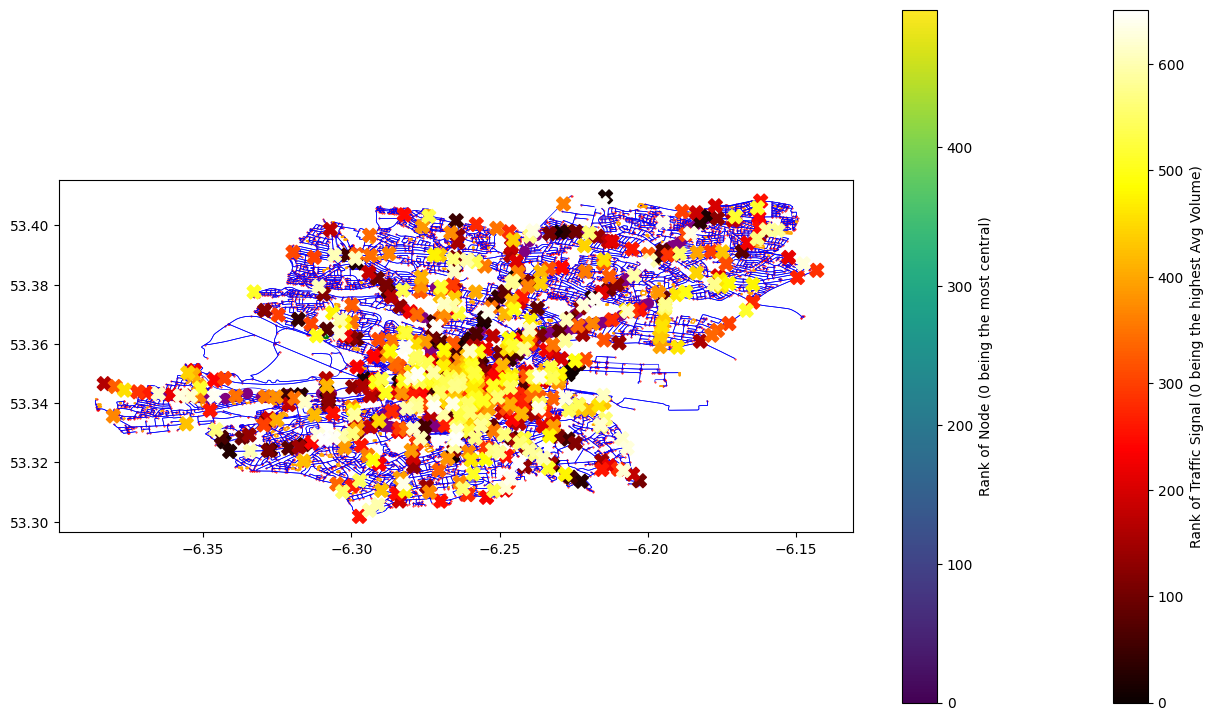

In [135]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads
import pandas as pd # Import pandas for DataFrame filtering
import numpy as np # Import numpy for linspace
import matplotlib.colors as mcolors # Import for colormap normalization

# Assuming 'edges' is a DataFrame with a 'geometry' column containing WKT strings
# Convert the 'geometry' column to a GeoSeries of shapely objects
geometry = edges['geometry'].apply(loads)
visualedges = gpd.GeoDataFrame(edges, geometry=geometry)

# Assuming 'nodes' is a DataFrame with 'x' and 'y' columns for coordinates
# Create a GeoDataFrame for the nodes
nodes_geometry = gpd.points_from_xy(nodes['x'], nodes['y'])
visualnodes = gpd.GeoDataFrame(nodes, geometry=nodes_geometry)

# Convert doubledroads and trippledroads to lists of tuples with original osmids
doubledroads_osmids = list(map(lambda element: (indextoosmid[element[0]], indextoosmid[element[1]]), doubledroads))
trippledroads_osmids = list(map(lambda element: (indextoosmid[element[0]], indextoosmid[element[1]]), trippledroads))


# Create boolean masks to identify doubled and trippled roads
is_trippled = visualedges.apply(lambda row: (row['u'], row['v']) in trippledroads_osmids or (row['v'], row['u']) in trippledroads_osmids, axis=1)
is_doubled = visualedges.apply(lambda row: (row['u'], row['v']) in doubledroads_osmids or (row['v'], row['u']) in doubledroads_osmids, axis=1)

# Separate the trippled roads, doubled roads (excluding trippled), and other roads
trippled_edges = visualedges[is_trippled]
doubled_edges = visualedges[is_doubled & ~is_trippled] # Doubled roads that are not trippled
other_edges = visualedges[~is_doubled] # Roads that are neither doubled nor trippled

# Define the number of top nodes to plot
n = 500 # Set the desired number of top nodes here

# Extract the top n node indices from sorted_approx_bc
top_node_indices = [node for node, bc in sorted_approx_bc[:n]]

# Create a GeoDataFrame for the top n nodes
top_nodes_gdf = visualnodes.iloc[top_node_indices]

# Create a colormap for the top nodes
cmap = plt.cm.get_cmap('viridis') # Get the colormap object

# Generate colors based on the rank of the node
colors = cmap(np.linspace(0, 1, n))

# Create a GeoDataFrame for the traffic signals from the averaged_df
traffic_signals_geometry = gpd.points_from_xy(averaged_df['Long'], averaged_df['Lat'])
traffic_signals_gdf = gpd.GeoDataFrame(averaged_df, geometry=traffic_signals_geometry)

# Sort traffic_signals_gdf by Avg_Volume in descending order
traffic_signals_gdf_sorted = traffic_signals_gdf.sort_values(by='Sum_Volume', ascending=False).reset_index(drop=True)

# Create a colormap for the traffic signals based on their rank
cmap_traffic = plt.cm.get_cmap('hot') # Get the colormap object

# Generate colors based on the rank of the traffic signal
colors_traffic = cmap_traffic(np.linspace(0, 1, len(traffic_signals_gdf_sorted)))


# Now plot the GeoDataFrames
fig, ax = plt.subplots(1, 1, figsize=(16, 9)) # Increase figure size

# Plot all nodes as red dots with reduced size and a lower zorder
visualnodes.plot(ax=ax, markersize=0.2, color='red', zorder=1)

# Plot the edges with a higher zorder than the red nodes
other_edges.plot(ax=ax, linewidth=0.5, color='blue', zorder=2) # Plot other edges in blue
doubled_edges.plot(ax=ax, linewidth=1.0, color='orange', zorder=2) # Increased linewidth for doubled roads
trippled_edges.plot(ax=ax, linewidth=1, color='green', zorder=2) # Increased linewidth for trippled roads


# Plot the top n nodes on top of all other elements
top_nodes_gdf.plot(ax=ax, markersize=50, color='purple', zorder=3) # Increased markersize and varying color for top nodes

# Plot the traffic signals colored by their rank
traffic_signals_gdf_sorted.plot(ax=ax, markersize=100, color=colors_traffic, marker='X', label='Traffic Signals (Rank by Avg Volume)', zorder=4)

# Add a color bar for the traffic signals
norm_traffic = mcolors.Normalize(vmin=0, vmax=len(traffic_signals_gdf_sorted)-1) # Normalize the color scale to the number of traffic signals
sm_traffic = plt.cm.ScalarMappable(cmap=cmap_traffic, norm=norm_traffic)
sm_traffic.set_array([]) # Needed for the colorbar to work
cbar_traffic = fig.colorbar(sm_traffic, ax=ax)
cbar_traffic.set_label('Rank of Traffic Signal (0 being the highest Avg Volume)')


# Add a color bar for the top nodes
norm = mcolors.Normalize(vmin=0, vmax=n-1) # Normalize the color scale to the number of nodes
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # Needed for the colorbar to work
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Rank of Node (0 being the most central)')


# Save the figure before showing it
plt.savefig('edges_plot_with_top_nodes_gradient.png', dpi=1000) # Save with higher dpi and new filename

plt.show()

In [100]:
from scipy.spatial import distance

# Create a list of coordinates for the nodes and traffic signals
node_coordinates = nodes[['y', 'x']].values
site_coordinates = averaged_df[['Lat', 'Long']].values

# Initialize lists to store the closest node index and osmid for each site
closest_node_index = []
closest_node_osmid = []

# Iterate through each traffic signal site
for site_coord in site_coordinates:
    # Calculate the distance from the current site to all nodes
    distances = distance.cdist([site_coord], node_coordinates, 'euclidean')[0]
    # Find the index of the closest node
    closest_node_idx = np.argmin(distances)
    # Get the osmid of the closest node
    closest_node_osm = indextoosmid[closest_node_idx]

    # Append the results to the lists
    closest_node_index.append(closest_node_idx)
    closest_node_osmid.append(closest_node_osm)

# Add the closest node index and osmid as new columns to the averaged_df DataFrame
averaged_df['closest_node_index'] = closest_node_index
averaged_df['closest_node_osmid'] = closest_node_osmid

# Display the updated DataFrame
display(averaged_df)

,SiteID,Avg_Volume,Sum_Volume,Lat,Long,closest_node_index,closest_node_osmid
0,1,11181,181908,53.348754,-6.257607,7560,1396454306
1,2,93289,1153294,53.354711,-6.246679,15,389372
2,3,48377,600098,53.351374,-6.250073,7558,1396443488
3,4,19756,252330,53.361145,-6.240513,3008,240380197
4,5,47739,591131,53.355797,-6.292406,363,12246878
...,...,...,...,...,...,...,...
647,964,15862,197932,53.357519,-6.286843,10174,4791105924
648,965,43299,565867,53.408150,-6.161950,6540,597818545
649,968,25029,323308,53.341474,-6.270088,9170,2468942558
650,974,14266,176662,53.362728,-6.311709,426,12428375


In [104]:
averaged_df

,SiteID,Avg_Volume,Sum_Volume,Lat,Long,closest_node_index,closest_node_osmid
0,1,11181,181908,53.348754,-6.257607,7560,1396454306
1,2,93289,1153294,53.354711,-6.246679,15,389372
2,3,48377,600098,53.351374,-6.250073,7558,1396443488
3,4,19756,252330,53.361145,-6.240513,3008,240380197
4,5,47739,591131,53.355797,-6.292406,363,12246878
...,...,...,...,...,...,...,...
647,964,15862,197932,53.357519,-6.286843,10174,4791105924
648,965,43299,565867,53.408150,-6.161950,6540,597818545
649,968,25029,323308,53.341474,-6.270088,9170,2468942558
650,974,14266,176662,53.362728,-6.311709,426,12428375


In [133]:
known_node_indices = averaged_df['closest_node_index'].to_list()

In [158]:
labels = np.array([averaged_df['Sum_Volume'][known_node_indices.index(index)]
                   if index in known_node_indices else 0 for index in range(11565) ])

In [142]:
len(labels)

11565

In [175]:
A = np.array([[1,2,3],
          [4,5,6],
          [7,8,9]])
np.ones(3)/np.sum(A,axis=0)

array([0.08333333, 0.06666667, 0.05555556])

In [ ]:
Y = labels

In [ ]:
for _ in range(100):
  Y = adj_matrix.T @ Y /np.sum(adj_matrix,axis=0)
  Y[labels!=0] = labels[labels!=0]
  Y = np.nan_to_num(Y, nan=0.0)
  print('hi')

/tmp/ipython-input-1769489219.py:2: RuntimeWarning: invalid value encountered in divide
  Y = adj_matrix.T @ Y /np.sum(adj_matrix,axis=0)


hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


In [184]:
np.sum(Y == 0)

np.int64(18)

,u,v,key,osmid,highway,lanes,maxspeed,name,oneway,ref,reversed,length,geometry,access,tunnel,bridge,width,junction,est_width,times
0,389279,1396858852,0,"[1288830596, 292236197, 1179644327, 1179644328...",secondary,2.0,40.0,Essex Quay,True,R148,False,158.294118,"LINESTRING (-6.2676306 53.3453413, -6.2677528 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.957353
1,389281,26165090,0,14039949,unclassified,1.0,30.0,York Street,True,NaN,False,108.266539,"LINESTRING (-6.2658639 53.3395894, -6.2657387 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.608885
2,389281,135109542,0,532427444,secondary,3.0,30.0,Aungier Street,False,R114,False,100.237245,"LINESTRING (-6.2658639 53.3395894, -6.2658319 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.341241
3,389281,2384200130,0,532427444,secondary,3.0,30.0,Aungier Street,False,R114,True,118.188046,"LINESTRING (-6.2658639 53.3395894, -6.2659031 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.939602
4,389292,3594514232,0,"[506780985, 3789703]",secondary,4.0,50.0,Beresford Place,True,R105,False,42.481342,"LINESTRING (-6.2549447 53.3482797, -6.2549462 ...",NaN,NaN,NaN,NaN,NaN,NaN,0.849627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,13042760002,11675734,0,1419362186,secondary,2.0,50.0,Blackhorse Avenue,False,R806,False,25.770704,"LINESTRING (-6.3144477 53.3631943, -6.3143639 ...",NaN,NaN,NaN,NaN,NaN,NaN,0.515414
26725,13042760003,12428373,0,7989948,unclassified,1.0,30.0,NaN,False,NaN,True,27.929939,"LINESTRING (-6.3145391 53.363134, -6.3146157 5...",NaN,NaN,NaN,NaN,NaN,NaN,0.930998
26726,13042760003,13042760002,0,1419350433,unclassified,1.0,30.0,NaN,True,NaN,False,9.205259,"LINESTRING (-6.3145391 53.363134, -6.3145135 5...",NaN,NaN,NaN,NaN,NaN,NaN,0.306842
26727,13051535633,610303883,0,"[1420323200, 47984842]",residential,2.0,30.0,Tower View Cottages,False,NaN,"[False, True]",129.728240,"LINESTRING (-6.2760979 53.3678092, -6.2760781 ...",NaN,NaN,NaN,NaN,NaN,NaN,4.324275
